In [23]:
from pycalphad import Database, variables as v
from espei.datasets import recursive_glob, load_datasets
from espei.plot import dataplot
from tinydb import where, Query

['FCC_A1', 'DELTA', 'LIQUID']
['MU_PHASE', 'BCC_A2']
['MU_PHASE', 'LAVES_C14', 'LIQUID']
['LIQUID', 'FCC_A1', 'DELTA', 'LAVES_C14']
['LIQUID', 'MU_PHASE', 'LAVES_C14']
['LIQUID', 'LAVES_C14', 'FCC_A1', 'DELTA']
['LIQUID', 'LAVES_C14', 'DELTA', 'MU_PHASE']
['LIQUID', 'DELTA', 'LAVES_C14', 'FCC_A1']
['LAVES_C14', 'DELTA', 'LIQUID']
['DELTA', 'LIQUID', 'LAVES_C14']
[{'components': ['FE', 'NB', 'NI'], 'phases': ['FCC_A1', 'DELTA', 'LIQUID'], 'conditions': {'P': [101325.0], 'T': [1523.0, 1523.0, 1523.0, 1523.0, 1523.0, 1523.0, 1523.0, 1523.0, 1523.0, 1523.0, 1523.0, 1523.0, 1523.0, 1523.0, 1523.0, 1523.0, 1523.0, 1523.0, 1523.0, 1523.0, 1523.0, 1523.0, 1523.0, 1523.0, 1523.0, 1523.0, 1523.0, 1523.0, 1523.0, 1523.0, 1523.0, 1523.0, 1523.0, 1523.0, 1523.0, 1523.0, 1523.0, 1523.0, 1523.0, 1523.0, 1523.0]}, 'broadcast_conditions': False, 'output': 'ZPF', 'values': [[['LIQUID', ['NI', 'FE'], [0.6271217018275502, 0.24409570182755025]], ['FCC_A1', ['NI', 'FE'], [0.6138609395838963, 0.3071209395838

<TriangularAxesSubplot:title={'center':'Fe-Nb-Ni'}, xlabel='X(FE)', ylabel='X(NB)'>

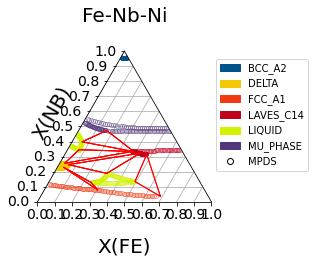

In [32]:
#dbf = Database('Cr-Fe-phase-new.TDB')
comps = ['FE','NB','NI','VA']
#phases = list(dbf.phases.keys())
#print(phases)
conds = {v.N: 1.0, v.P: 101325, v.T: (1523.0), v.X('FE'): (0, 1, 0.02),v.X('NB'): (0, 1, 0.02)}
datasets = load_datasets(recursive_glob('.','*.json'))
datasets.update({'reference':'MPDS'},Query().reference.exists())
for records in datasets:
    a=records['phases']
    records['phases']=['DELTA' if o=='NBNI3' else o for o in records['phases']]
    records['phases']=['LIQUID' if o=='L' else o for o in records['phases']]
    records['phases']=['LAVES_C14' if o=='NBFE2' else o for o in records['phases']]
    records['phases']=['FCC_A1' if o=='(FE,NI)' else o for o in records['phases']]
    records['phases']=['MU_PHASE' if o=='FE' else o for o in records['phases']]
    records['phases']=['BCC_A2' if o=='(NB6.33FE6.67,NB7NI6)' else o for o in records['phases']]
    datasets.update({'phases':records['phases']},where('phases')==a)
    print(records['phases'])
    for i in range(len(records['values'])):
        for j in range(len(records['values'][i])):
            records['values'][i][j] = ['DELTA' if o=='NBNI3' else o for o in records['values'][i][j]]
            records['values'][i][j] = ['LIQUID' if o=='L' else o for o in records['values'][i][j]]
            records['values'][i][j] = ['LAVES_C14' if o=='NBFE2' else o for o in records['values'][i][j]]
            records['values'][i][j] = ['FCC_A1' if o=='(FE,NI)' else o for o in records['values'][i][j]]
            records['values'][i][j] = ['MU_PHASE' if o=='FE' else o for o in records['values'][i][j]]
            records['values'][i][j] = ['BCC_A2' if o=='(NB6.33FE6.67,NB7NI6)' else o for o in records['values'][i][j]]
print(datasets.all())
phases_1 = [r['phases'] for r in datasets]
phases_db = []
for i in phases_1:
    for j in i:
        if j not in phases_db:
            phases_db.append(j)
print(phases_db)
dataplot(comps, phases_db, conds,datasets,tielines=False)